**🛒Walmart Sales Forecasting🛒** 

**Background**
Walmart es una reconocida corporación minorista que opera una cadena de hipermercados. Walmart ha proporcionado datos que combinan 45 tiendas cada tienda con diferentes dpartamentos, incluyendo información de la tienda y ventas mensuales, que se proporcionan semanalmente.

**Business Objectives**
Nuestro objetivo principal es predecir las ventas de la tienda en una semana. Dado que se proporcionan datos relacionados con el tamaño del conjunto de datos y el tiempo, se analiza si las ventas se ven afectadas por factores basados en el tiempo y el espacio. A demas Walmart proporciona rebajas durante el año. Estas rebajas se realizan dias antes de los dias festivos destacados, el segundo objetivo es modelar los efectos de las rebajas en estas semanas en ausencia de datos historicos completos e ideales.

**Tareas de análisis**

Tareas básicas de estadísticas

1) ¿Qué tienda tiene el máximo de ventas?

2) Qué tienda tiene la desviación estándar máxima, es decir, las ventas varían mucho. Además, averigüe el coeficiente de media a desviación estándar

3) ¿Qué tienda/s tiene una buena tasa de crecimiento trimestral en el tercer trimestre de 2012?

4) Algunas festividades tienen un impacto negativo en las ventas. Averigüe los días festivos que tienen ventas más altas que las ventas medias en temporada no festiva para todas las tiendas juntas

5) Proporcione una vista mensual y semestral de las ventas en unidades y brinde información

Modelo estadístico

Para la tienda 1: cree modelos de predicción para pronosticar la demanda

Regresión lineal: utilice variables como la fecha y reestructure las fechas como 1 para el 5 de febrero de 2010 (a partir de la fecha más antigua en orden). Haga una hipótesis sobre si el IPC, el desempleo y el precio del combustible tienen algún impacto en las ventas.

Cambie las fechas a días creando una nueva variable.

Seleccione el modelo que ofrezca la mejor precisión.

In [23]:


from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing



# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [24]:
# Importando dataset
df_feature = pd.read_csv('~/datasets/new/features.csv')
df_feature



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [25]:
# Importando Dataset store
df_store = pd.read_csv('~/datasets/new/stores.csv')
df_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


**Descripción del conjunto de datos:**

Estos son los datos históricos que abarcan las ventas desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:

***Dataset Features:***

*Tienda* - el número de la tienda

*Fecha* - la semana de ventas (los datos se registran el  día viernes)

*Weekly_Sales* - ventas para la tienda dada

*Holiday_Flag*: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva

*Temperatura* - Temperatura el día de la venta

*Fuel_Price* - Costo del combustible en la región durante esa semana

*IPC* – Índice de precios al consumidor vigente durante esa semana

*Desempleo* - Tasa de desempleo durante esa semana en la region de la tienda

*MarkDown1* -  Datos anónimos relacionados con las rebajas promocionales que está realizando Walmart

***Dataset Stores*** contiene información anonimizada sobre las 45 tiendas, indicando el tipo y tamaño de la tienda:

*Store* - Tiendas numeradas del 1 al 45

*Type* - Tipo de tienda, hay 3 tipos: A, B y C

*Size* - El tamaño de las tiendas se calcula segun el numero de productos disponibles en la tienda que va desde 34000 a 210000

***Dataset Train*** Estos son los datos de entrenamiento históricos, que abarcan desde 2010–02–05 hasta 2012–11–01.

*Store* - Numero de tienda

*Dept* - uno de 1 a 99 que muestra el departamento

*Date* - La semana

*Weekly_Sales* - Las ventas registradas durante esa semana

*IsHoliday* - un valor booleano que representa una semana de vacaciones o no

**Eventos festivos:**

*Super Bowl*: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013

*Día del Trabajo*: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13

*Acción de gracias*: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13

*Navidad*: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13

In [26]:
# Importando Dataset train
df_train = pd.read_csv('~/datasets/new/train.csv')
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [27]:
  # Unir los datasets utilizando la columna 'Store' como llave primaria
merged_data = pd.merge(df_train, df_store, on='Store')
merged_data = pd.merge(merged_data, df_feature, on=['Store', 'Date'], how='left')
merged_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

En total contamos con 421570 valores de entrenamiento (train).

**Manipulacio de los Datos:**

In [29]:
# Comprobando valores nulos
missings = merged_data.isnull().sum()
missings

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

Las columnas MarkDowns tienen considerables valores nan imputamos ceros en esos lugares faltantes de manera respectiva.

In [30]:
# Imputar ceros en las columnas Markdowns
merged_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merged_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

print(merged_data.sample(5))

        Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
188064     20     6  2010-05-14      10922.51        False    A  203742   
55135       6    51  2010-02-12         46.60         True    A  202505   
417459     45    42  2012-03-30       4744.24        False    B  118221   
314761     33     5  2012-10-26         90.00        False    A   39690   
279052     29    14  2012-01-06       8610.86        False    B   93638   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
188064        55.91       2.982       0.00       0.00       0.00       0.00   
55135         40.57       2.548       0.00       0.00       0.00       0.00   
417459        50.04       3.953    9866.15     206.18       3.25    1815.37   
314761        73.70       4.301     122.41      13.71       0.00       0.00   
279052        34.61       3.439    4557.94   13427.99       9.56     550.78   

        MarkDown5         CPI  Unemployment  IsHoliday_y  
188064       0.

In [31]:
# Comprobar si Columna IsHoliday_x  y Columna IsHoliday_y  tienen los mismos valores
son_iguales = merged_data['IsHoliday_x'].equals(merged_data['IsHoliday_y'])

print('son_iguales')

son_iguales


Eliminamos la columna 'IsHoliday_y' ya que es igual a la columna 'IsHoliday_x'.

In [32]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [33]:
# Eliminar la última columna
merged_data = merged_data.iloc[:, :-1]
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


Cambiamos el tipo de dato de la columna 'date' a todatetime.

In [34]:
# Converting "Data" column to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [35]:
# Ordenar los datos por Fecha de manera Ascendente 
merged_data.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379648,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145
181170,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992
181313,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992
181599,19,33,2012-10-26,5740.14,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992


In [36]:
# Diferentes valores de columna 'Store'
print('cantidad de tiendas:' , merged_data['Store'].nunique() )


cantidad de tiendas: 45


In [37]:
# Valores unicos de la tienda y el tipo
print('el valor unico de la tienda es', merged_data['Store'].unique())
print('el valor unico del tipo de tienda es', merged_data['Type'].unique())

el valor unico de la tienda es [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
el valor unico del tipo de tienda es ['A' 'B' 'C']


In [38]:
# Valores unicos de Departamento
print('el valor unico de departamentos son', merged_data['Dept'].unique())

el valor unico de departamentos son [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [39]:
print('cantidad de Departamentos:' , merged_data['Dept'].nunique() )

cantidad de Departamentos: 81


En cuanto a los Departamentos "Dept" observamos que hay registro de 81 departamentos que van desde el numero 1 hasta el numero 99, hay algunos departamentos del cual no tenemos registro como 84, 86, 88, 89, 15, 18, 19, 20, 21, 22, 23, 24, 25.

In [40]:
# Groupby y Estadisticas basicas para tener una pista de como se comportan las ventas en cada tipo de tienda.
agrupando = merged_data.groupby('Type')
print(agrupando.describe()['Size'].round(2)) 

         count       mean       std      min       25%       50%       75%  \
Type                                                                         
A     215478.0  182231.29  41534.53  39690.0  158114.0  202505.0  203819.0   
B     163495.0  101818.74  30921.78  34875.0   93188.0  114533.0  123737.0   
C      42597.0   40535.73   1194.43  39690.0   39690.0   39910.0   41062.0   

           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0  


Se uso un groupby para observar el comportamiento estadistico de la distribución del tamaño de las tiendas para cada uno de los tipos de tiendas.  del cual podemos concluir:
La mayor cantidad de observaciones se realizo para las tiendas tipo A.
la media del  tamaño de las tiendas es mayor para A, en menor medida para B y consecutivamente las tiendas tipo C.
En el minimo valor del tamaño de las tiendas corresponde para las tiendas tipo B y se observa u un igual valor para tiendas tipo A y B del cual podemos concluir que las observaciones para la tienda tipo C no fueron suficientes para determinar el minimo tamaño de tiendas tipo C de lo que suponemos que los registros faltantes de los departamentos 84, 86, 88, 89, 15, 18, 19, 20, 21, 22, 23, 24, 25 algnos de ellos pertenencen a tiendas tipo C.

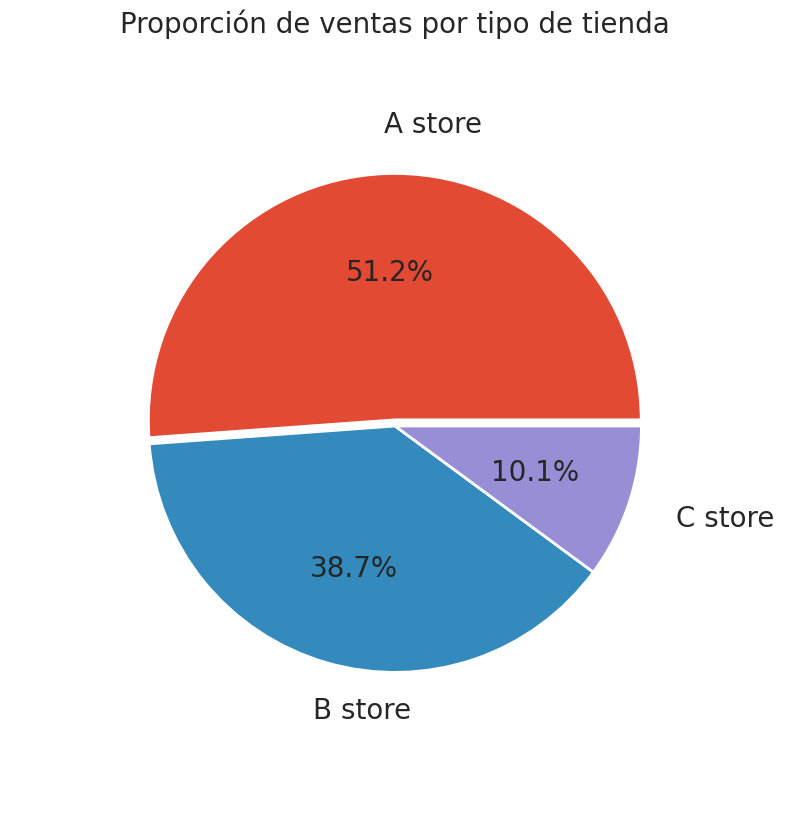

In [41]:
# Graficar la distribucion de las ventas por el tipo de tienda 

# Definiendo el tipo de grafico
plt.style.use('ggplot')

# Definiendo etiquetas 
labels = ['A store', 'B store', 'C store']

# Calculando la proporcion de cada tienda en porcentaje 
sizes = [214961/(162787+42464+214961)*100, 162787/(162787+42464+214961)*100, 42464/(162787+42464+214961)*100]

fig, axes = plt.subplots(1, 1, figsize=(10, 10))

textprops = {'fontsize': 20}

# Creacion de grafico pie y especificacion de propiedades
axes.pie(sizes, labels=labels, explode=(0.02, 0, 0), autopct='%1.1f%%', pctdistance=0.6, labeldistance=1.2, 
         textprops=textprops, wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, radius=0.8, center=(0.5, 0.5))
axes.set_title('Proporción de ventas por tipo de tienda', fontsize=20)

plt.show()


En el anterior grafico se encontraron las proporciones de los datos en cada tipo de tienda y  pudimos observar que el **51.2% de las ventas corresponden a las tiendas tipo A, aproximadamente el 38.7% de las ventas corresponden a las tiendas del tipo B y el 10.1% de las ventas corresponden a las tiendas del tipo C.**

Seguidamente observaremos el tamano de cada tipo de tienda con un diagrama de cajas.

Text(0.5, 1.0, 'Tamaño de las Tiendas por Tipo')

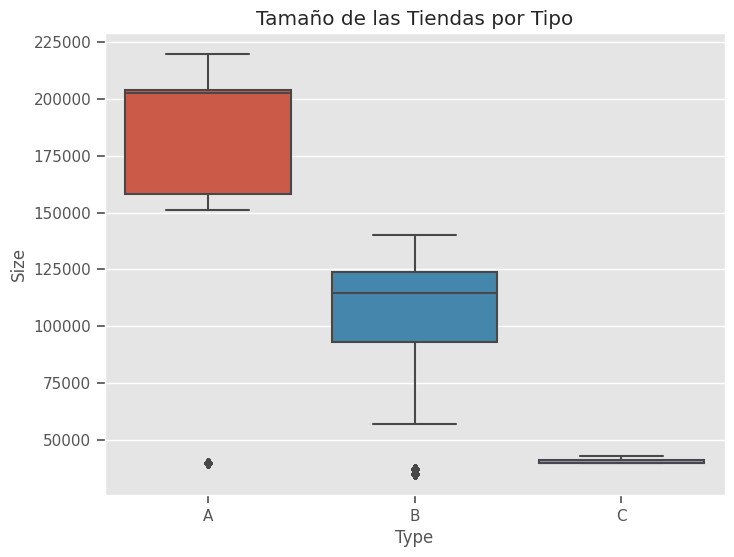

In [42]:
# Visualizacion de la distribucion de las tiendas por tipo.

# Combinar dos columnas en un nuevo dataframe.
tienda_siz = pd.concat([merged_data['Type'], merged_data['Size']], axis=1)

# Crea una figura y conjunto de ejes con un tamano de 8 por 6 pulgadas.
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='Type', y='Size', data=tienda_siz)
ax.set_title("Tamaño de las Tiendas por Tipo")


Del grafico de cajas anterior notamos que :
**1. La tienda del tipo A es la mas grande.**
**2. La tienda del tipo C es la mas pequeña**
Los dos anteriores graficos nos dejan como conclusion que **Las Tiendas del tipo A que son las mas grandes registran las mayores ventas semanales.**

Conclusion: El tipo y tamano de tienda son buenas caracteristicas para predecir las ventas.


**Matrix de correlacion** para observar relacion entre nuestra variable objetivo 'Weekly_Sales' y su relacion con las variables del dataframe y obtener un mejor analisis.

/tmp/ipykernel_382/1697421205.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_data.corr()


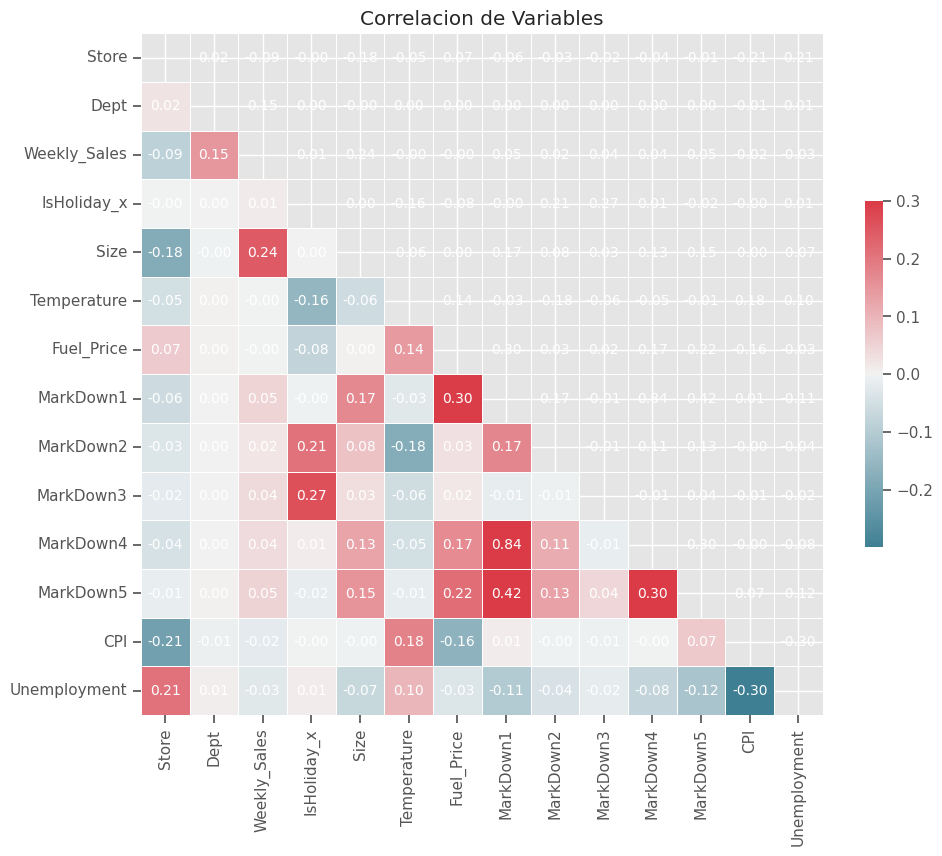

In [43]:
# Relacion de las variables con la variable objetivo a predecir "weekly_sales"
import matplotlib.pyplot as plt

# Correlation matrix
corr = merged_data.corr()

# Generando mascara
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# configurando matplot
f, ax = plt.subplots(figsize=(11, 9))

# configuracion de colores
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibujando el heatmap 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Anadir numeros de correlacion
for i in range(len(corr)):
    for j in range(len(corr)):
        if i != j:
            ax.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.2f}",
                    ha="center", va="center", color="w")
plt.title('Correlacion de Variables')
plt.show()

**Correlaciones entre características:**
El valor del coeficiente de correlación varía entre +1 y -1.
Un valor de ± 1 indica un perfecto grado de asociación entre las dos variables. A medida que el valor del coeficiente de correlación se acerque a 0, la relación entre las dos variables será más débil. La dirección de la relación está indicada por el signo del coeficiente; un signo + indica una relación positiva y un signo — indica una relación negativa.

Podemos ver que hay una correlacion positiva fuerte entre Weekly_sales y el tamaño de la tienda o "size" concluyendo que "size' es una variable que debe ser considerada para la prediccion de las ventas, a demas de una relacion positiva con la variable "Dept" dejando ver tambien que "Dept" es una variable a considerar para la prediccion de las ventas, asi como una correlacion negativa moderada entre 'weekly sales' y 'Store' lo que posiblemente sugiere que hay un aumento o disminucion de las ventas semanales dependiendo de el tipo de tienda A,B o C y "store" es otra de las variables a considerar para la prediccion de las ventas.

**Relacion entre Variable objetivo "Weekly_Sales" y "Dept":**

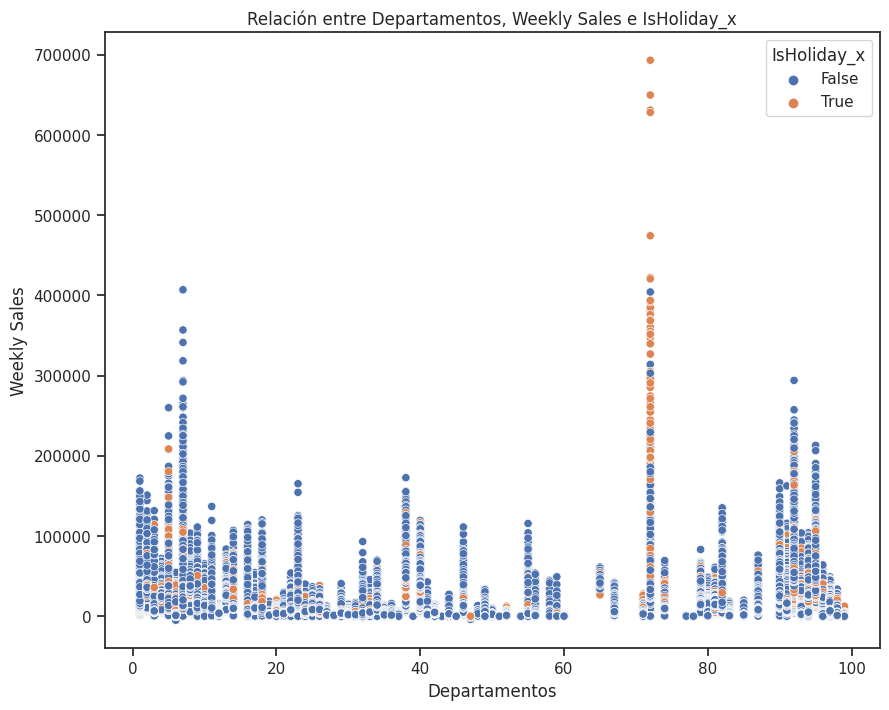

In [44]:
# Gráfico de dispersión que muestra la relación entre 'Dept', 'weekly_sales' y si la semana incluye un 'Holiday'
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x="Dept", y="Weekly_Sales", hue="IsHoliday_x", data=merged_data, ax=ax)

ax.set_xlabel("Departamentos")
ax.set_ylabel("Weekly Sales")
ax.set_title("Relación entre Departamentos, Weekly Sales e IsHoliday_x")

plt.show()


In [45]:
# Funcion para determinar el departamento con mayores ventas por semana durante Holidays.
import pandas as pd

def dept_max_sales_holiday(df):
    # Filtrar solo las ventas durante los holidays Boolean
    holiday_sales = df[df['IsHoliday_x'] == True]

    # Agrupar por departamento y sumar las ventas
    sales_by_dept = holiday_sales.groupby('Dept')['Weekly_Sales'].sum()

    # Obtener el departamento con mayores ventas
    dept_max_sales = sales_by_dept.idxmax()

    # Obtener el valor de las ventas del departamento con mayores ventas
    max_sales = sales_by_dept[dept_max_sales]

    return f"El departamento {dept_max_sales} tiene el mayor número de ventas durante los holidays con un total de ${max_sales:.2f}."


print(dept_max_sales_holiday(merged_data))


El departamento 72 tiene el mayor número de ventas durante los holidays con un total de $40313605.46.


De acuerdo al grafico de dispersion y apoyandonos con una funcion observamos que el departamento 72 muestra el mayor registro de ventas en dolares de 
$40,313,605.46 durante 'Holidays' del 2010, 2011, 2012.  Sin embargo, otros no lo hacen y aún más en algunos departamentos las ventas "no holidays" son más altas. Eso significa que el tipo de Holiday no siempre influye de manera positiva en las ventas.

Podemos representar de manera grafica las otras relaciones encontradas con 'Weekly_sales" para analizar mas a fondo.

In [46]:
# Relacion entre Weekly sales y Size 
import matplotlib.pyplot as plt

def plot_weekly_sales_size(merged_data):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(merged_data['Size'], merged_data['Weekly_Sales'])
    ax.set_xlabel('Size')
    ax.set_ylabel('Weekly Sales')
    ax.set_title('Weekly Sales vs Size')
    plt.show()


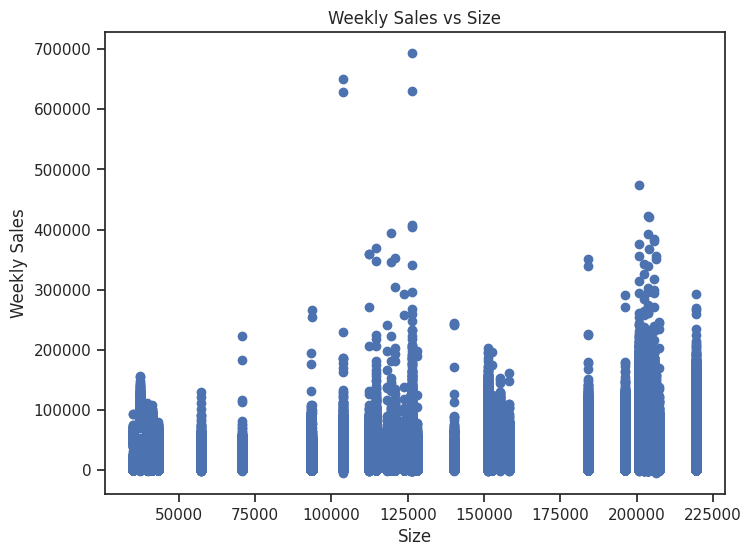

In [47]:
plot_weekly_sales_size(merged_data)


El gráfico de dispersión anterior representa la relación entre las variables "Weekly Sales" y "Size" . Cada punto en el gráfico representa una tienda y su posición en el eje x y en el eje y indica su valor para "Size" y "Weekly Sales", respectivamente.

La pendiente de la línea de puntos en el gráfico sugiere una correlación positiva entre las variables "Size" y "Weekly Sales", lo que significa que las tiendas más grandes tienden a tener ventas semanales más altas. Sin embargo, la dispersión de los puntos alrededor de la línea de puntos indica que la relación entre las variables no es perfecta y que hay cierta variabilidad en las ventas semanales incluso para tiendas del mismo tamaño.

También podemos ver algunos puntos extremos (outliers) en el gráfico, que representan tiendas con valores inusuales para "Size" y "Weekly Sales". Estos puntos pueden ser el resultado de errores de medición o pueden indicar que algunas tiendas están experimentando situaciones únicas que afectan sus ventas semanales.

In [48]:
# Grafica relacion entre Weekly Sales y Dept.

import matplotlib.pyplot as plt

def plot_weekly_sales_dept(merged_data):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(merged_data['Dept'], merged_data['Weekly_Sales'])
    ax.set_xlabel('Dept')
    ax.set_ylabel('Weekly Sales')
    ax.set_title('Weekly Sales vs Dept')
    plt.show()

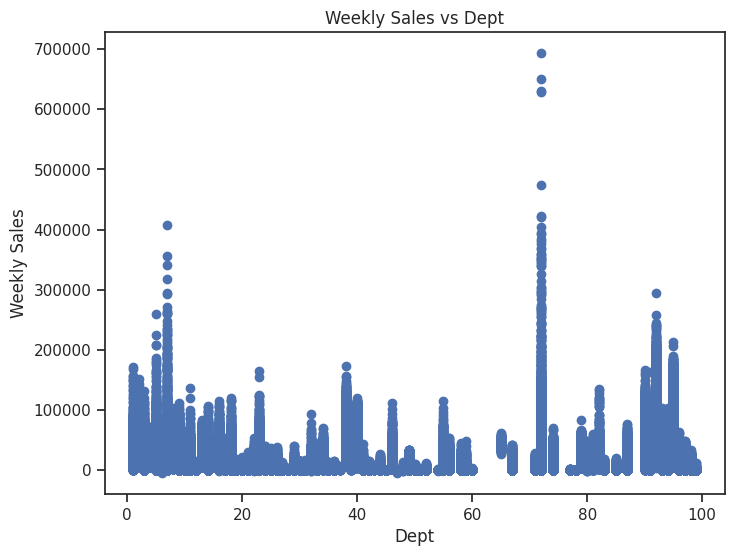

In [49]:
plot_weekly_sales_dept(merged_data)

En el grafico de dispercion anterior, podemos observar que hay una amplia variabilidad en las ventas semanales entre los diferentes departamentos. Algunos departamentos parecen tener ventas más altas que otros de manera consistente, mientras que otros departamentos tienen ventas más variables.

También podemos ver que hay algunas semanas en las que los departamentos tienen ventas inusualmente altas o bajas. Estos puntos pueden ser de interés para el análisis adicional, ya que pueden indicar eventos especiales que afectan las ventas.


***Respondiendo preguntas propuestas***

***1) ¿Qué tienda tiene el máximo de ventas?***

In [50]:
# Agrupar por tienda y sumar las ventas
sales_by_store = merged_data.groupby("Store")[["Weekly_Sales"]].sum()

# Ordenar las ventas de forma descendente
sales_by_store = sales_by_store.sort_values(by="Weekly_Sales", ascending=False)

sales_by_store

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


In [51]:
# Mostrar la tienda con más ventas
print("La tienda con más ventas es la número:", sales_by_store.index[0])

La tienda con más ventas es la número: 20


La tienda con más ventas es la número: 20


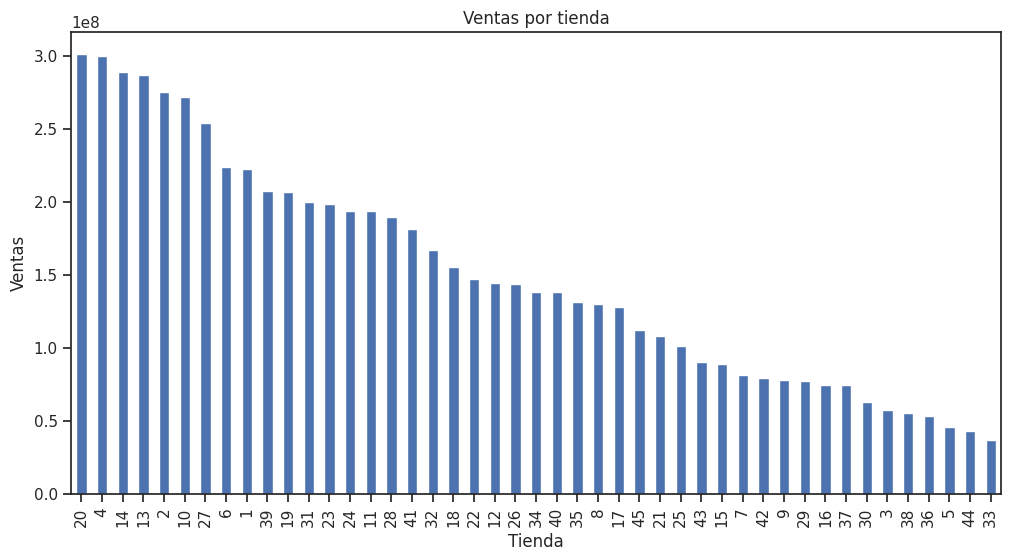

In [52]:
# visualizar de manera grafica el resultado
sales_by_store.plot(kind="bar", figsize=(12,6), legend=None)
plt.title("Ventas por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ventas")

# Mostrar la tienda con más ventas
print("La tienda con más ventas es la número:", sales_by_store.index[0])

# Mostrar el gráfico
plt.show()

**2) Qué tienda tiene la desviación estándar máxima, es decir, las ventas varían mucho. Además, averigüe el coeficiente de desviación medio**

In [53]:
# Agrupar por tienda y calcular la desviación estándar y la media
sales_std_mean = merged_data.groupby("Store")[["Weekly_Sales"]].agg(['std', 'mean'])

# Calcular el coeficiente de desviación para cada tienda
sales_std_mean["coef_of_var"] = sales_std_mean[("Weekly_Sales", "std")] / sales_std_mean[("Weekly_Sales", "mean")]

# Ordenar las tiendas por coeficiente de desviación de forma descendente
sales_std_mean = sales_std_mean.sort_values(by="coef_of_var", ascending=False)

# Mostrar la tienda con mayor coeficiente de desviación
print("La tienda con mayor coeficiente de desviación es la número:", sales_std_mean.index[0])

# Calcular el coeficiente de desviación medio para todas las tiendas
coef_of_var_mean = sales_std_mean["coef_of_var"].mean()

# Mostrar el coeficiente de desviación medio
print("El coeficiente de desviación medio es:", coef_of_var_mean)

La tienda con mayor coeficiente de desviación es la número: 3
El coeficiente de desviación medio es: 1.3295610490293537


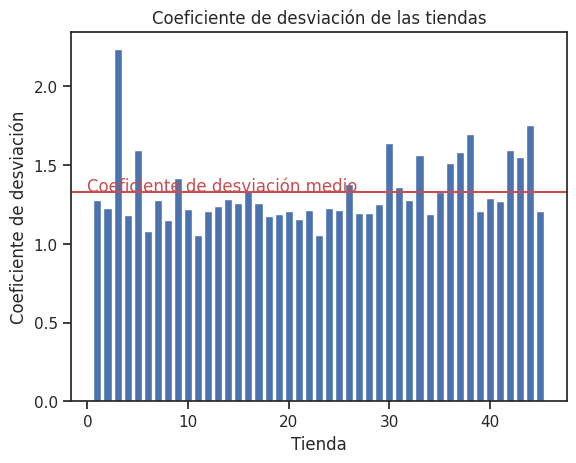

In [54]:
# Crear un gráfico de barras para mostrar el coeficiente de desviación de cada tienda
plt.bar(sales_std_mean.index, sales_std_mean["coef_of_var"])

# Añadir un título al gráfico
plt.title("Coeficiente de desviación de las tiendas")

# Añadir etiquetas a los ejes
plt.xlabel("Tienda")
plt.ylabel("Coeficiente de desviación")

# Añadir una línea horizontal para el coeficiente de desviación medio
plt.axhline(y=coef_of_var_mean, color='r', linestyle='-')
plt.text(0, coef_of_var_mean + 0.005, "Coeficiente de desviación medio", color='r')

# Mostrar el gráfico
plt.show()


Este gráfico permite identificar las tiendas que tienen una mayor variabilidad en sus ventas semanales como la tienda 3 lo que significa que sus ventas semanales varian significativamente tambien observamos que la mayoria de las tiendas tienen un coeficiente de desviacion por debajo de l promedio indicando que las ventas semanales varian en menor medida en relacion a la media, lo que puede ser útil para tomar decisiones en cuanto a estrategias de marketing y gestión de inventario.

**3) ¿Qué tienda/s tiene una buena tasa de crecimiento trimestral en el tercer trimestre de 2012?**

In [55]:
# Splitting la columna dato en columna 'day', 'month', 'year'
merged_data["Day"]= pd.DatetimeIndex(merged_data['Date']).day
merged_data['Month'] = pd.DatetimeIndex(merged_data['Date']).month
merged_data['Year'] = pd.DatetimeIndex(merged_data['Date']).year
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,12,2,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,19,2,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,26,2,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,9,2012
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,5,10,2012
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,12,10,2012
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,19,10,2012


Text(0.5, 1.0, 'Crecimiento de los ultimos trimestres del 2012 en ventas')

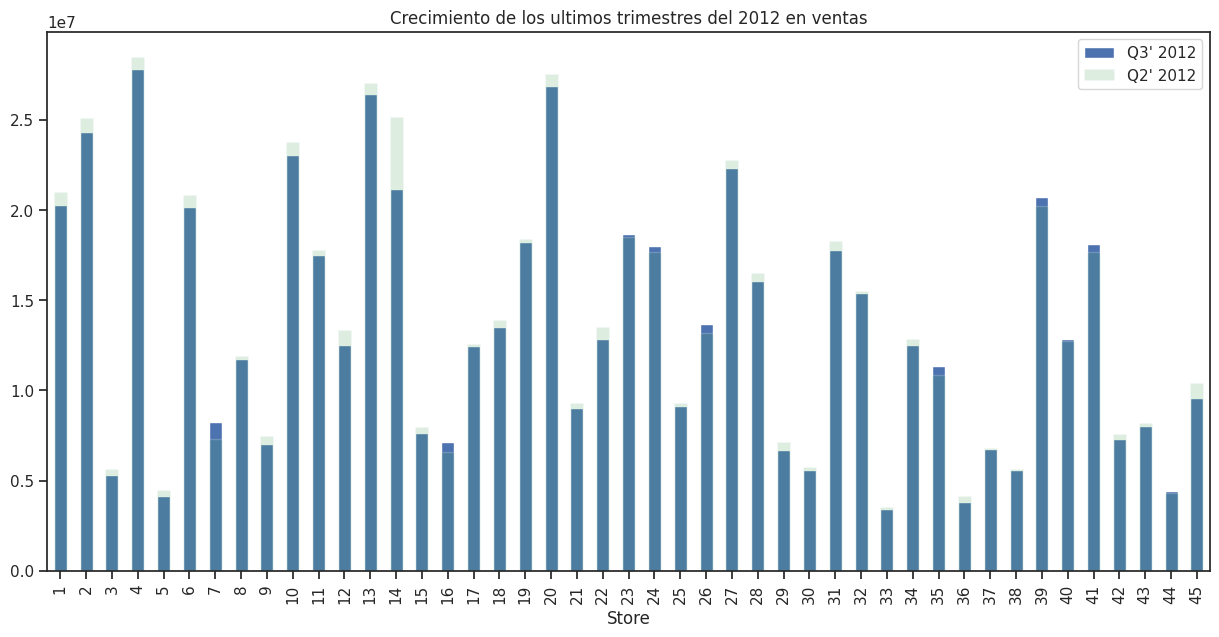

In [56]:
# ventas para el 2do y 3er trimestre in 2012
q_2_sales = merged_data[(merged_data['Date'] >= '2012-04-01') & (merged_data['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
q_3_sales= merged_data[(merged_data['Date'] >= '2012-07-01') & (merged_data['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
plt.figure(figsize=(15,7))
q_2_sales.plot(ax=q_3_sales.plot(kind ='bar'),kind='bar',color='g',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])
plt.title("Crecimiento de los ultimos trimestres del 2012 en ventas")

En el anterior grafico observamos que la tienda 4 tuvo el mejor crecimiento trimestral para el tercer trimestre del 2012.

**4) Algunas festividades tienen un impacto negativo en las ventas. Averigüe los días festivos que tienen ventas más altas que las ventas medias en temporada no festiva para todas las tiendas juntas**


***Fechas de dias festivos***

Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']

Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']

Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']

Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [57]:
# Filtrar por días festivos
holiday_sales = merged_data.loc[merged_data['IsHoliday_x'] == True]

# Agrupar por fecha y calcular la venta semanal total
holiday_sales_total = holiday_sales.groupby(['Store', 'Date'])['Weekly_Sales'].sum()

# Ordenar las ventas de mayor a menor
holiday_sales_total_sorted = holiday_sales_total.sort_values(ascending=False)

# Imprimir las 5 fechas de días festivos con las ventas más altas
print(holiday_sales_total_sorted.head())


Store  Date      
4      2011-11-25    3004702.33
10     2011-11-25    2950198.64
       2010-11-26    2939946.38
14     2010-11-26    2921709.71
20     2011-11-25    2906233.25
Name: Weekly_Sales, dtype: float64


De lo anterior tenemos una pista de el dia festivo que registro mas ventas es el 'Thanksgiving' en las tiendas 4, 10, 14 y 20.

In [58]:
#calculamos la media de ventas en dias festivos
def holiday_sales_mean(merged_data):
    # Filtrar por datos de días festivos (IsHoliday = True)
    holiday_sales = merged_data.loc[merged_data['IsHoliday_x'] == True]
    # Calcular la venta semanal promedio en días festivos
    holiday_sales_mean = holiday_sales.groupby(['Date'])['Weekly_Sales'].mean()
    return holiday_sales_mean.mean()


In [59]:
print("Media de ventas en días festivos: ", holiday_sales_mean(merged_data))


Media de ventas en días festivos:  17028.712504208226


In [60]:
# Obtenemos dataframe con medias por tienda y departamento 
medians = pd.DataFrame({'Median Sales': merged_data.loc[merged_data['IsHoliday_x'] == True].groupby(by=['Type', 'Dept', 'Store', 'Month'])['Weekly_Sales'].median()}).reset_index().sort_values('Median Sales', ascending=False)
medians.head(30)



,Type,Dept,Store,Month,Median Sales
9862,B,72,10,11,662049.275
9906,B,72,35,11,638866.555
4619,A,72,14,11,425139.205
4627,A,72,20,11,407164.635
4639,A,72,27,11,394535.380
4599,A,72,4,11,383061.575
9890,B,72,22,11,369618.715
9866,B,72,12,11,360068.130
9894,B,72,23,11,358755.530
4643,A,72,28,11,353560.050


De la anterior tabla observamos en orden de mayor a menor la media por mes si fueron mes con fecha festiva, confirmando que las medias mas altas en ventas fueron en el mes de Thanks giving , lo cual indica que son las 'holidays' que afectan de manera positiva las ventas, tambien se puede considerar la posibilidad de que en ese mes se celebra el black friday tambien otra festividad con sales que deberia registrar un alta en las ventas.

In [61]:
# Calculamos la media de los dias no festivos

# Filtrar las filas con 'IsHoliday' = 0
non_holiday_sales = merged_data.loc[merged_data['IsHoliday_x'] == False]

# Calculando la media de 'non_holiday_dales'
mean_non_holiday_sales = non_holiday_sales['Weekly_Sales'].mean()

print("Mean of non-holiday sales:", mean_non_holiday_sales)

Mean of non-holiday sales: 15901.445069008367


**5. Proporcione una vista mensual y semestral de las ventas en unidades y brinde información o comentarios de la gráfica**

In [62]:
merged_data['Semester'] = merged_data['Month'].apply(lambda x: 'First Semester' if x <= 6 else 'Second Semester')


Text(0.5, 1.0, 'Ventas semestrales')

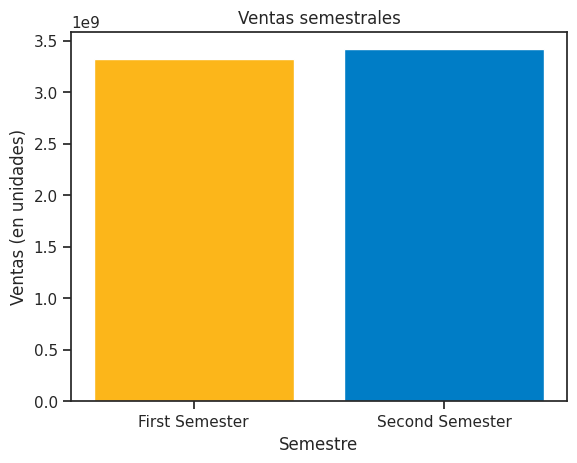

In [63]:
# Agregar columna Semester
merged_data['Semester'] = merged_data['Month'].apply(lambda x: 'First Semester' if x <= 6 else 'Second Semester')

# Agrupar por mes y sumar las ventas en unidades correspondientes
monthly_sales = merged_data.groupby(['Month'])['Weekly_Sales'].sum()
semesterly_sales = merged_data.groupby(['Semester'])['Weekly_Sales'].sum()



# Crear figura y ejes para la gráfica semestral

colors = ['#FCB61A', '#007DC6']
fig, ax = plt.subplots()
ax.bar(semesterly_sales.index, semesterly_sales.values, color=colors)
ax.set_xlabel('Semestre')
ax.set_ylabel('Ventas (en unidades)')
ax.set_title('Ventas semestrales')

**Ventas por Mes:**

In [64]:
# Para ver los mejores meses en cuanto a ventas.
merged_data.groupby('Month')['Weekly_Sales'].mean() 

Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

Confirmamos que los mejores meses en cuanto a ventas son los meses de Noviembre y Diciembre en los cuales se encuentran holidays importantes una de ellas la que mayor ventas registra que es ThanksGiving para la ultima semana de noviembre de lo que podemos concljuir que el holiday de "Thanks Giving" y "Christmas" influye de manera positiva en las ventas, observamos que para el mes de septiembre no se grafica un registro de ventas, en este mes se celebra el holiday de "Labor Day" debemos revizar a fondo las ventas para ese mes y asi poder identificar que es lo que sucede en este mes.

**Creando nuevas columnas de semestre y semana con las fechas** para visualizar las ventas por meses, a#os e identificar semestre y semana.

In [65]:
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['week'] = merged_data['Date'].dt.week


/tmp/ipykernel_382/173003560.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged_data['week'] = merged_data['Date'].dt.week


In [66]:
merged_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year,Semester,week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,5,2,2010,First Semester,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,...,0.0,0.0,0.0,211.242170,8.106,12,2,2010,First Semester,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,...,0.0,0.0,0.0,211.289143,8.106,19,2,2010,First Semester,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,...,0.0,0.0,0.0,211.319643,8.106,26,2,2010,First Semester,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,...,0.0,0.0,0.0,211.350143,8.106,5,3,2010,First Semester,9


In [67]:
# Para ver el mejor a#o en cuanto a ventas.
merged_data.groupby('Year')['Weekly_Sales'].mean()

Year
2010    16270.275737
2011    15954.070675
2012    15694.948597
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Venta por meses de los años desde el 2010 al 2012 ')

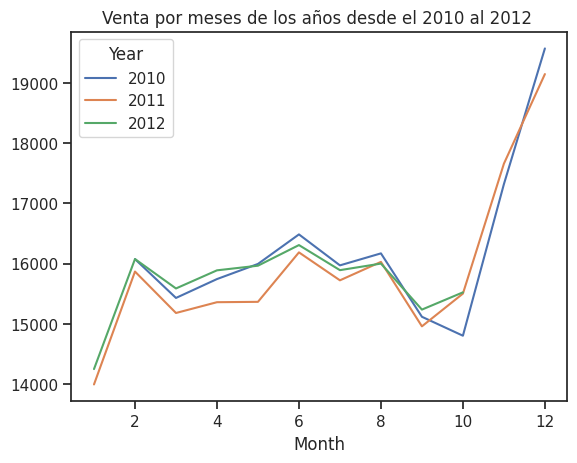

In [68]:
# Graficamos las ventas por meses para los tres a#os.
monthly_sales = pd.pivot_table(merged_data, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()
plt.title("Venta por meses de los años desde el 2010 al 2012 ")

De la anterior grafica podemos observar que del año 2012 no hay registros de ventas para el tercer timestre lo cual no nos permitira observar si las holidays de 'Thanksgiving' y 'Christmas' influyeron de forma positiva o negativa en las ventas. En una vista mas profunda a el grafico observamos un ascenso acelerado en las ventas para el tercer trimestre de los años 2010 y 2011, mas a fondo el año 2011 tuvo mayores ventas que el 2010 pero al final del año el 2010 se alzo sobre el 2011, confirmando que dichas ventas aumentaron en el 'Holiday' de 'Thanks giving' y 'Christmas ya que estos festivos aceleran las ventas. En el mes de febrero se observa un importante aumento de las ventas puede ser efecto de el holiday de 'Superbowl' o otro holiday no considerado como "Valentine's day', para el holiday del mes de Semptiembre 'Dia de trabajo' se observa un decrecimiento en las ventas lo que deja en visto que esta festividad no aumenta las ventas en esa semana o mes de manera notoria. 

In [69]:
# Super Bowl boleano agregando columna
merged_data.loc[(merged_data['Date'] == '2010-02-12')|(merged_data['Date'] == '2011-02-11')|(merged_data['Date'] == '2012-02-10'),'Super_Bowl'] = True
merged_data.loc[(merged_data['Date'] != '2010-02-12')&(merged_data['Date'] != '2011-02-11')&(merged_data['Date'] != '2012-02-10'),'Super_Bowl'] = False

#Labor Day boleano agregando columna
merged_data.loc[(merged_data['Date'] == '2010-09-10')|(merged_data['Date'] == '2011-09-09')|(merged_data['Date'] == '2012-09-07'),'Labor_Day'] = True
merged_data.loc[(merged_data['Date'] != '2010-09-10')&(merged_data['Date'] != '2011-09-09')&(merged_data['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving day boleano agregando columna
merged_data.loc[(merged_data['Date'] == '2010-11-26')|(merged_data['Date'] == '2011-11-25'),'Thanksgiving'] = True
merged_data.loc[(merged_data['Date'] != '2010-11-26')&(merged_data['Date'] != '2011-11-25'),'Thanksgiving'] = False

# Christmas day boleano agregando columna
merged_data.loc[(merged_data['Date'] == '2010-12-31')|(merged_data['Date'] == '2011-12-30'),'Christmas'] = True
merged_data.loc[(merged_data['Date'] != '2010-12-31')&(merged_data['Date'] != '2011-12-30'),'Christmas'] = False

In [70]:
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Unemployment,Day,Month,Year,Semester,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,...,8.106,5,2,2010,First Semester,5,False,False,False,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,...,8.106,12,2,2010,First Semester,6,True,False,False,False
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,...,8.106,19,2,2010,First Semester,7,False,False,False,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,...,8.106,26,2,2010,First Semester,8,False,False,False,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,...,8.106,5,3,2010,First Semester,9,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,...,8.684,28,9,2012,Second Semester,39,False,False,False,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,...,8.667,5,10,2012,Second Semester,40,False,False,False,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,...,8.667,12,10,2012,Second Semester,41,False,False,False,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,...,8.667,19,10,2012,Second Semester,42,False,False,False,False


In [71]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [72]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])


**Graficos de promedio de ventas para tienda de tipo A en holidays y no holidays**

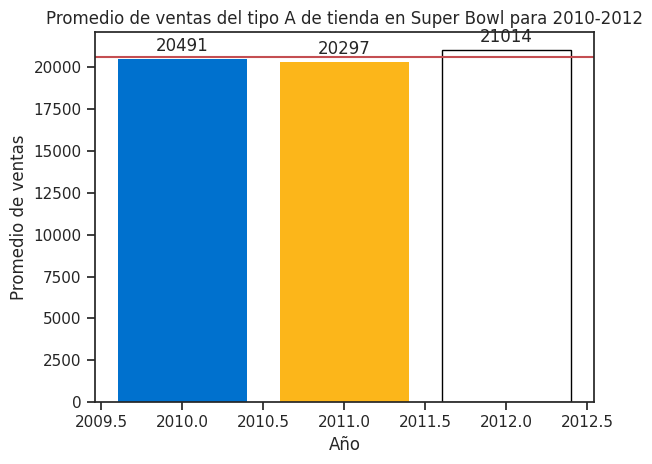

In [73]:
def sales_by_year_on_super_bowl(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'A') & (merged_data['Super_Bowl'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo A de tienda en Super Bowl para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()    
    plt.show()
sales_by_year_on_super_bowl(merged_data)


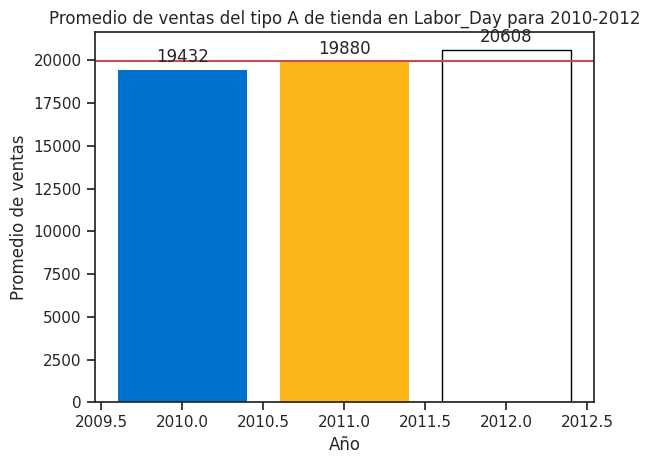

In [74]:
def sales_by_year_on_Labor_Day(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'A') & (merged_data['Labor_Day'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo A de tienda en Labor_Day para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')
 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()
sales_by_year_on_Labor_Day(merged_data)    

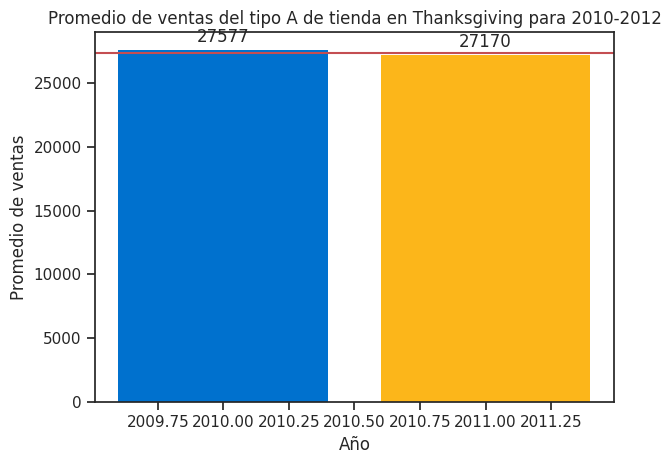

In [75]:
def sales_by_year_on_Thanksgiving(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'A') & (merged_data['Thanksgiving'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo A de tienda en Thanksgiving para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()    
    plt.show()
sales_by_year_on_Thanksgiving(merged_data)

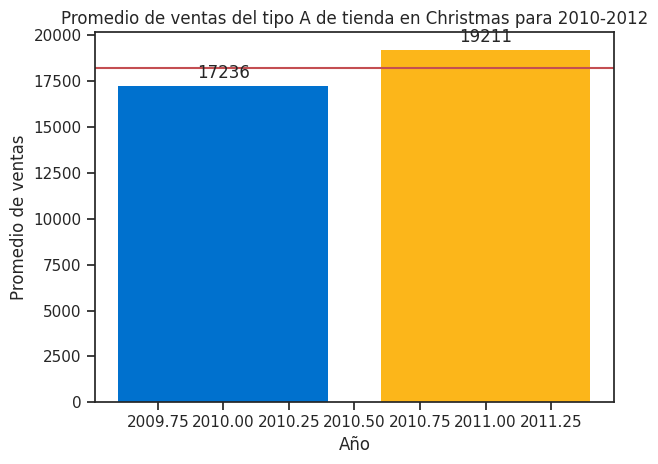

In [76]:
def sales_by_year_on_Christmas(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'A') & (merged_data['Christmas'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo A de tienda en Christmas para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()    
    plt.show()
sales_by_year_on_Christmas(merged_data)

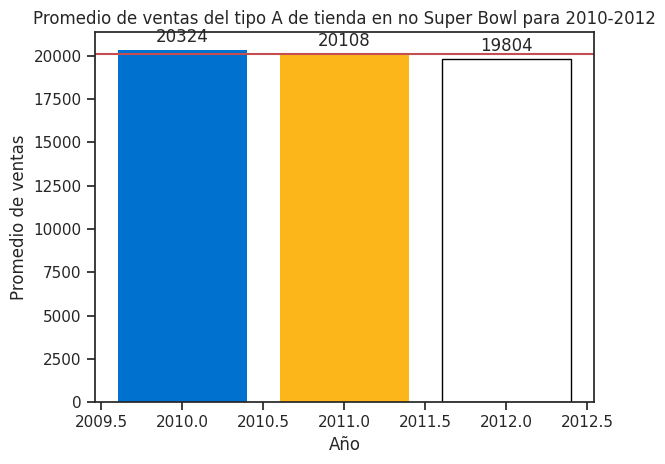

In [77]:
def sales_by_year_on_Not_super_bowl(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'A') & (merged_data['Super_Bowl'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo A de tienda en no Super Bowl para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()    
    plt.show()

sales_by_year_on_Not_super_bowl(merged_data)

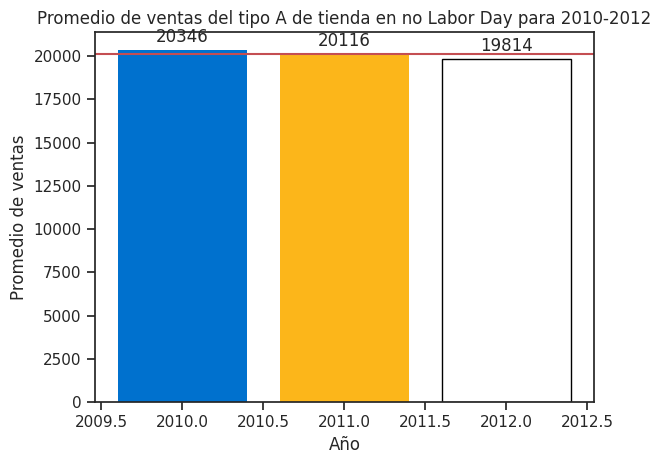

In [78]:
def sales_by_year_on_Not_Labor_Day(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'A') & (merged_data['Labor_Day'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo A de tienda en no Labor Day para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()    
    plt.show()

sales_by_year_on_Not_Labor_Day(merged_data)

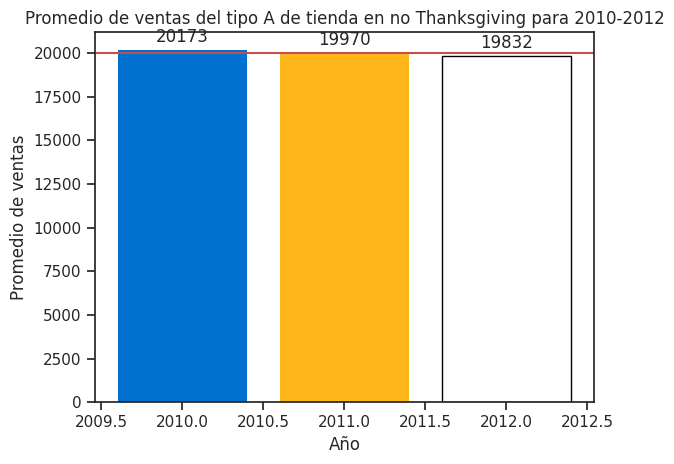

In [79]:

def sales_by_year_on_Not_Thanksgiving(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'A') & (merged_data['Thanksgiving'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots(dpi=100)
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo A de tienda en no Thanksgiving para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()    
    plt.show()

sales_by_year_on_Not_Thanksgiving(merged_data)


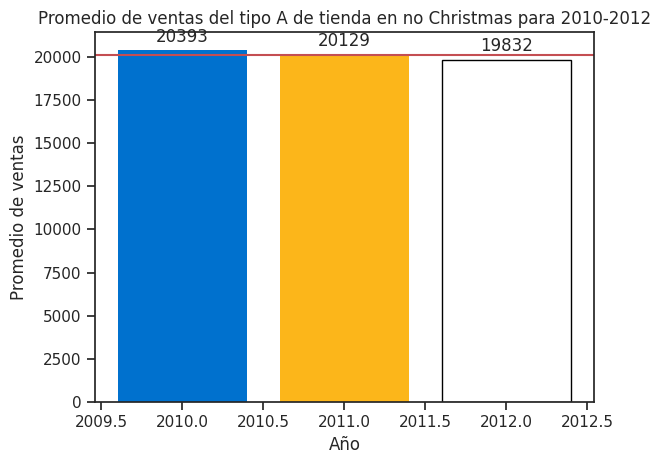

In [80]:
import matplotlib.pyplot as plt

def sales_by_year_on_Not_Christmas(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'A') & (merged_data['Christmas'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots(dpi=100)
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])


    ax.set_title('Promedio de ventas del tipo A de tienda en no Christmas para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

  # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()   
    plt.show()

sales_by_year_on_Not_Christmas(merged_data)


**Tienda tipo B**

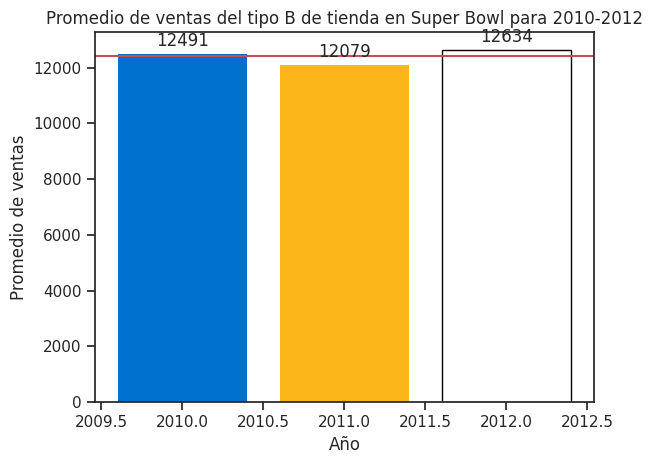

In [81]:
def sales_by_year_on_super_bowl(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'B') & (merged_data['Super_Bowl'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo B de tienda en Super Bowl para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()
sales_by_year_on_super_bowl(merged_data)

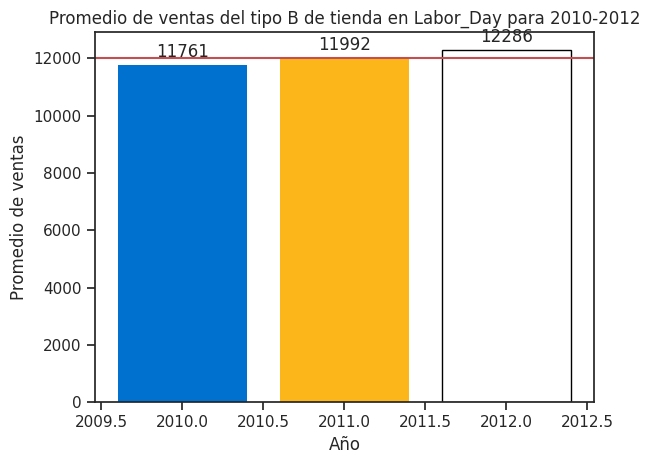

In [82]:
def sales_by_year_on_Labor_Day(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'B') & (merged_data['Labor_Day'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo B de tienda en Labor_Day para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()
sales_by_year_on_Labor_Day(merged_data)


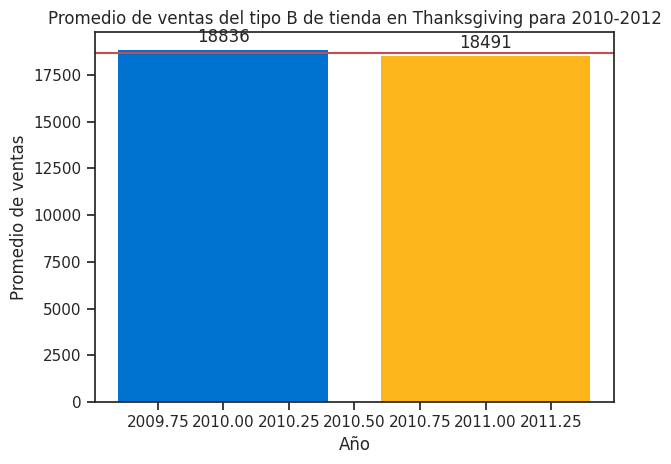

In [83]:
def sales_by_year_on_Thanksgiving(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'B') & (merged_data['Thanksgiving'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo B de tienda en Thanksgiving para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

  # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()   
    plt.show()

sales_by_year_on_Thanksgiving(merged_data)

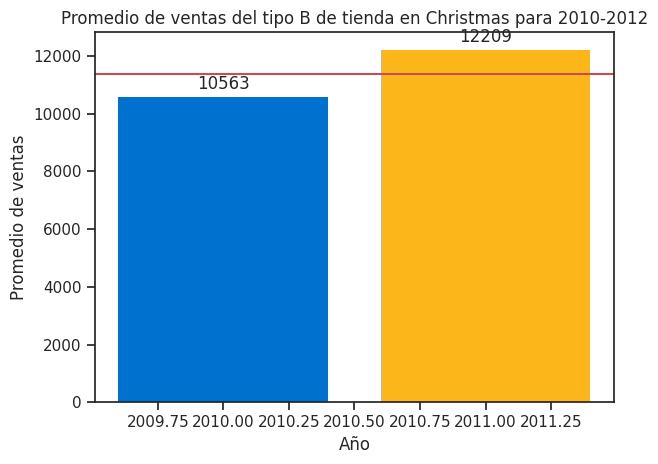

In [84]:
def sales_by_year_on_Christmas(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'B') & (merged_data['Christmas'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo B de tienda en Christmas para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')
 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()

sales_by_year_on_Christmas(merged_data)

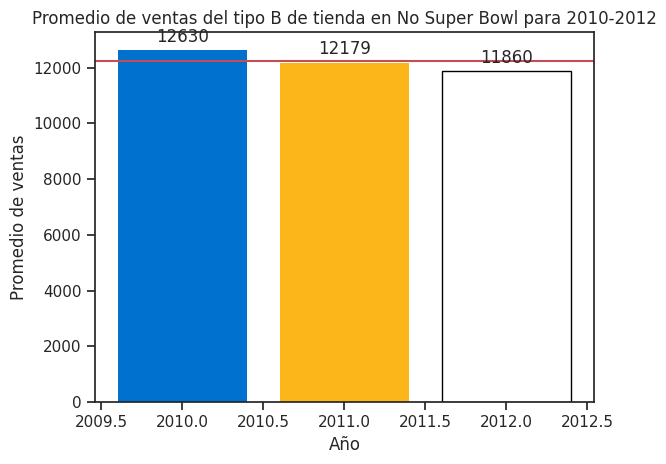

In [85]:
def sales_by_year_on__Not_super_bowl(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'B') & (merged_data['Super_Bowl'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo B de tienda en No Super Bowl para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

  # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()   
    plt.show()
sales_by_year_on__Not_super_bowl(merged_data)


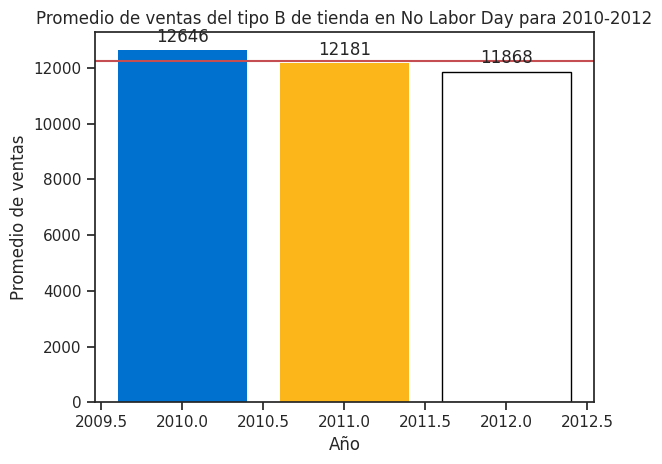

In [86]:
def sales_by_year_on__Not_Labor_Day(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'B') & (merged_data['Labor_Day'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo B de tienda en No Labor Day para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

  # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()   
    plt.show()
sales_by_year_on__Not_Labor_Day(merged_data)

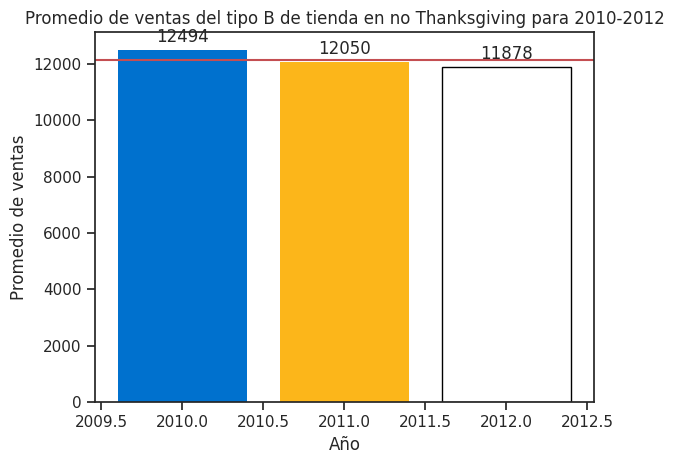

In [87]:
def sales_by_year_on_No_Thanksgiving(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'B') & (merged_data['Thanksgiving'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo B de tienda en no Thanksgiving para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')
 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()

sales_by_year_on_No_Thanksgiving(merged_data)

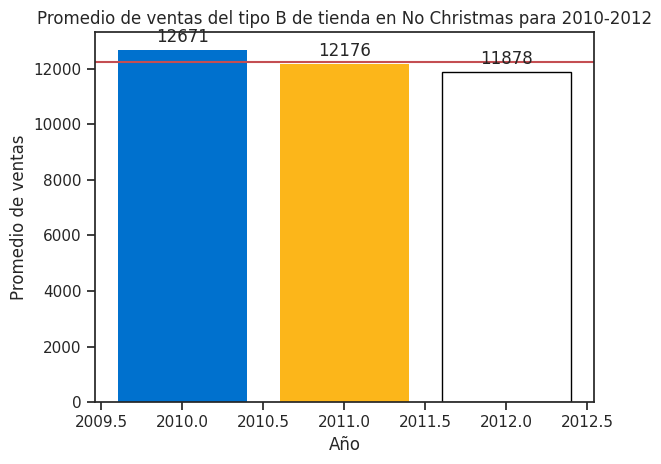

In [88]:
def sales_by_year_on__No_Christmas(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'B') & (merged_data['Christmas'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo B de tienda en No Christmas para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

  # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()   
    plt.show()

sales_by_year_on__No_Christmas(merged_data)

**Tienda tipo C**

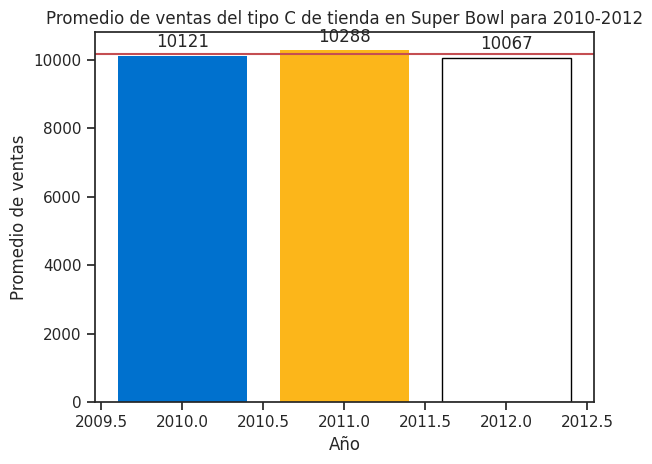

In [89]:
def sales_by_year_on_super_bowl(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'C') & (merged_data['Super_Bowl'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo C de tienda en Super Bowl para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()

sales_by_year_on_super_bowl(merged_data)

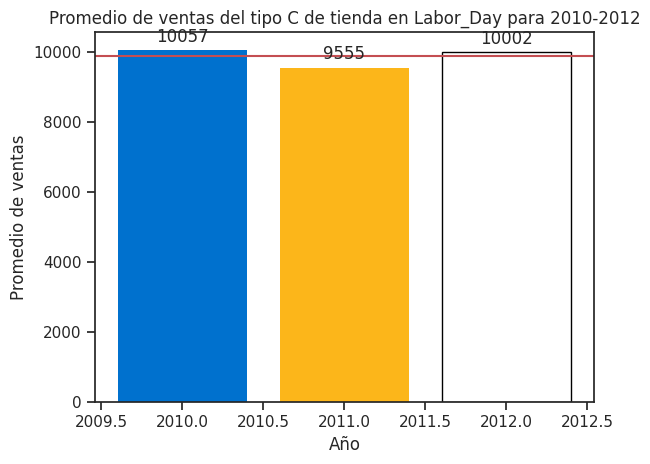

In [90]:
def sales_by_year_on_Labor_Day(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'C') & (merged_data['Labor_Day'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo C de tienda en Labor_Day para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()
sales_by_year_on_Labor_Day(merged_data)


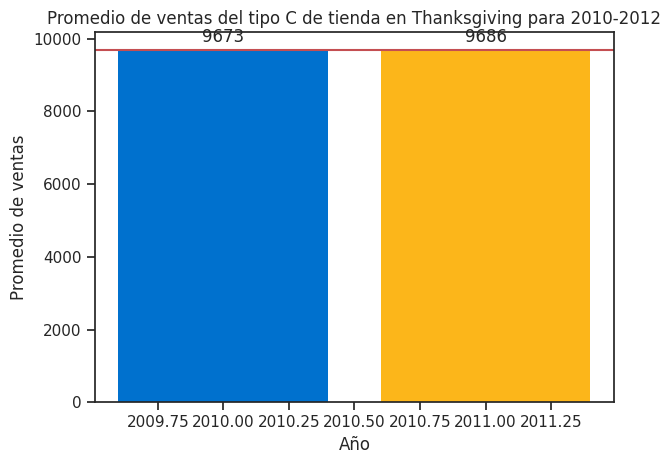

In [91]:
def sales_by_year_on_Thanksgiving(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'C') & (merged_data['Thanksgiving'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo C de tienda en Thanksgiving para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()

sales_by_year_on_Thanksgiving(merged_data)

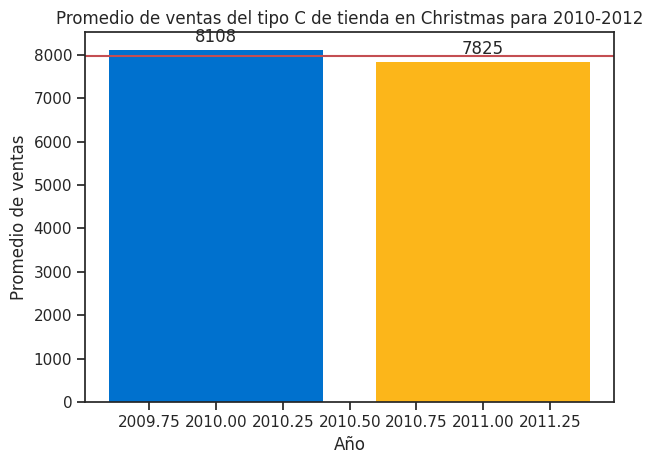

In [92]:
def sales_by_year_on_Christmas(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'C') & (merged_data['Christmas'] == True) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo C de tienda en Christmas para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()

sales_by_year_on_Christmas(merged_data)

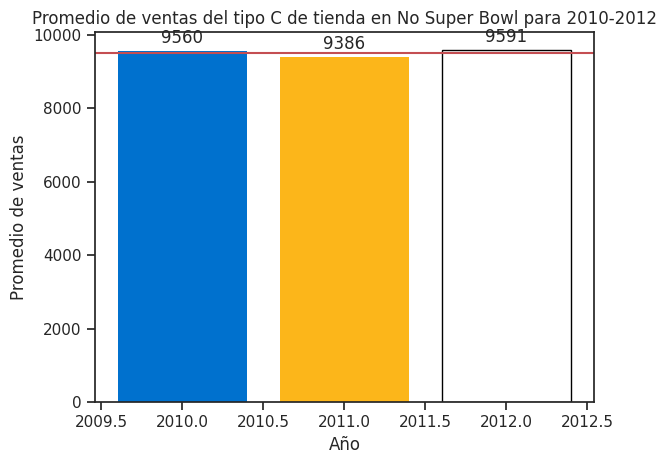

In [93]:
def sales_by_year_on__Not_super_bowl(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'C') & (merged_data['Super_Bowl'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo C de tienda en No Super Bowl para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()
sales_by_year_on__Not_super_bowl(merged_data)


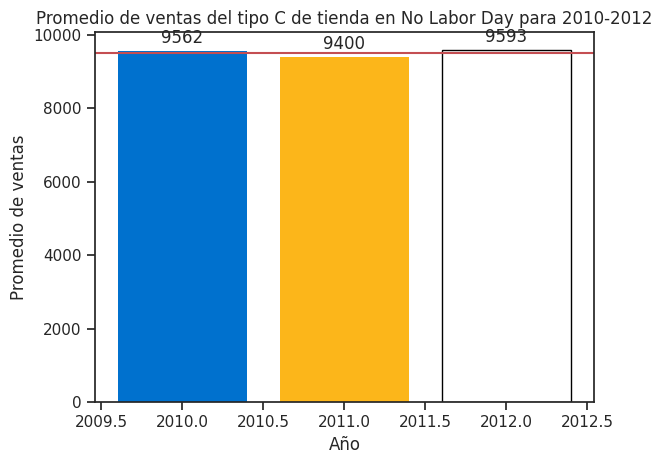

In [94]:
def sales_by_year_on__Not_Labor_Day(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'C') & (merged_data['Labor_Day'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo C de tienda en No Labor Day para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()
    plt.show()
sales_by_year_on__Not_Labor_Day(merged_data)


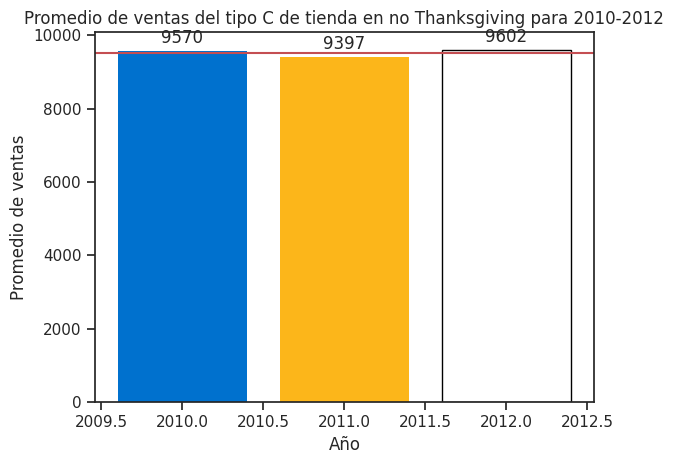

In [95]:
def sales_by_year_on_No_Thanksgiving(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'C') & (merged_data['Thanksgiving'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo C de tienda en no Thanksgiving para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()
    plt.show()

sales_by_year_on_No_Thanksgiving(merged_data)



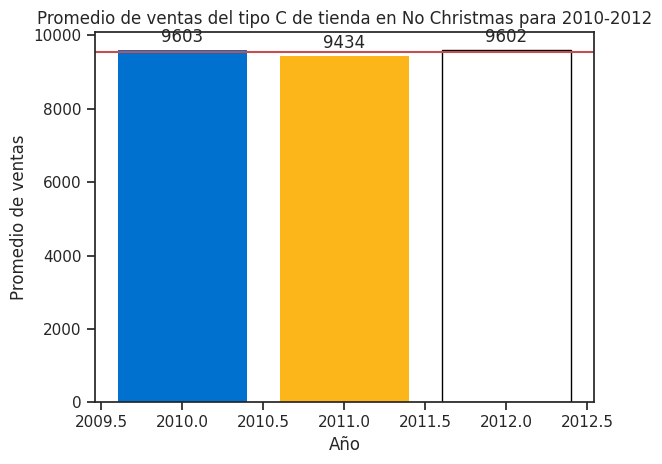

In [96]:
def sales_by_year_on__No_Christmas(merged_data):
    # seleccionar los datos relevantes
    relevant_data = merged_data.loc[(merged_data['Type'] == 'C') & (merged_data['Christmas'] == False) & (merged_data['Date'].dt.year.isin([2010, 2011, 2012]))]
    
    # agrupar los datos por año y calcular el promedio de ventas
    sales_by_year = relevant_data.groupby(relevant_data['Date'].dt.year)['Weekly_Sales'].mean()
    
     # crear una lista de colores para las barras
    num_bars = len(sales_by_year)
    colors = ['#0071CE', '#FCB61A', 'white'][:num_bars]

    # crear un gráfico de barras con los promedios de ventas para cada año
    fig, ax = plt.subplots()
    ax.bar(sales_by_year.index, sales_by_year.values, color=colors, edgecolor=['black' if c == 'white' else 'none' for c in colors])

    ax.set_title('Promedio de ventas del tipo C de tienda en No Christmas para 2010-2012')
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio de ventas')

 # agregar etiquetas a las barras
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(ax.containers[0]) # etiquetar la primera serie de barras
    
    plt.axhline(y=sales_by_year.mean(), color='r') # agregar una línea horizontal para el promedio general de ventas
    fig.tight_layout()

    plt.show()

sales_by_year_on__No_Christmas(merged_data)


***construyendo  train-test set***

In [97]:
from sklearn.model_selection import train_test_split

# Separar el conjunto de características (X) de la variable objetivo (y)
X = merged_data[['Dept', 'Size', 'Store']]
y = merged_data['Weekly_Sales']

# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba (80% y 20%, respectivamente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Machine Learning Models*** probaremos diferentes modelos para evaluar el mas acertado y finalmente entrenar toda la data .

In [98]:
#  estandarización de las características (X) en los conjuntos de datos de entrenamiento y prueba.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**KNN Regressor**

In [99]:
# KNN Regressor
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [100]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = knn.score(X_test, y_test)
print('Accuracy del modelo: ' , accuracy)

2903.190897632659
59268943.74515652
7698.632589308086
Accuracy del modelo:  0.8863427792635629


Un accuracy del modelo de 0.886 indica que el modelo ha predicho correctamente el 88.6% de las muestras del conjunto de prueba. Si el modelo KNN REGRESSOR se utiliza para predecir nuevas muestras, se espera que tenga una tasa de acierto del 88.6%. Por ejemplo, si el modelo se utiliza para predecir el precio de venta semanal en un supermercado, se espera que el 88.6% de las predicciones sean cercanas al valor real.

In [101]:
from sklearn.metrics import explained_variance_score, r2_score

# Calcula el explained variance score
evs = explained_variance_score(y_test, y_pred)

# Calcula el R² score
r2 = r2_score(y_test, y_pred)

# Imprime los resultados
print("Explained variance score:", evs)
print("R² score:", r2)



Explained variance score: 0.8863496827637509
R² score: 0.8863427792635629


En otras palabras, el modelo KNeighborsRegressor puede explicar el 88.63% de la variabilidad en los datos del conjunto de prueba.

El R² score de 0.8863 indica que el modelo KNeighborsRegressor se ajusta bastante bien a los datos del conjunto de prueba.

In [102]:
print("Precisión del_modelo 88.63% ")

Precisión del_modelo 88.63% 


**Decision tree Regessor**

In [103]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [104]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = dt.score(X_test, y_test)
print('Accuracy del modelo: ' , accuracy)

2708.1323764055046
53207503.541288786
7294.3473691132085
Accuracy del modelo:  0.8979665134437086


El modelo Decision Tree Regressor ha predicho correctamente el 89.79% de las muestras del conjunto de prueba. Si usamos este modelo para predecir las ventas semanales en el supermercado, se espera que el 89.79% de las predicciones sean cercanas al valor real.

In [105]:
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)


In [106]:
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))


Precisión del modelo: 89.80%


**Random Forest Regressor**

In [107]:
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [108]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = rfr.score(X_test, y_test)
print('Accuracy del modelo: ' , accuracy)

2827.0096314780853
54142258.922079235
7358.142355382861
Accuracy del modelo:  0.8961739777254092


EL modelo Random Forest Regressor ha predicho correctamente el 89.62% de las muestras del conjunto de prueba. Si usamos este modelo para predecir nuevas ventas semanales, se espera que el 89.62% de las predicciones sean cercanas al valor real.

In [109]:
print(accuracy)



0.8961739777254092


**XGBRegressor**

In [110]:
from xgboost import XGBRegressor

xgb_clf = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)

[23:05:00] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = xgb_clf.score(X_test, y_test)
print('Accuracy del modelo: ' , accuracy)

2711.0605262998365
53162982.28599401
7291.294966327587
Accuracy del modelo:  0.8980518897271508


El modelo XGBRegressor ha predicho correcrtamente el 88.6% de las muestras del conjunto de prueba. Si usamos este modelo para la prediccion semanal de ventas, se espera que 89.80% de las predicciones sean cercanas al valor real.

In [112]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)



R^2 score: 0.8980518897271508


el modelo explica el 89.80% de la varianza en los datos de prueba.

**ExtraTreesRegressor**

In [113]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

In [114]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = etr.score(X_test, y_test)

print("R² del modelo: ", etr.score(X_test, y_test))



2708.3220947309337
53210924.582463644
7294.581864813338
R² del modelo:  0.8979599530765519


Accuracy: 89.79%

In [115]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model", "MAE", "RMSE", "Accuracy"]
x.add_row(["KNNRegressor", 2903, 7698, 88.63])
x.add_row(["DecisionTreeRegressor", 2708, 7294, 89.80])
x.add_row(["RandomForestRegressor", 2827, 7357, 89.61])
x.add_row(["ExtraTreeRegressor", 2708, 7294, 89.79])
x.add_row(["XGBRegressor", 2711, 7291, 89.80 ])

print(x)

+-----------------------+------+------+----------+
|         Model         | MAE  | RMSE | Accuracy |
+-----------------------+------+------+----------+
|      KNNRegressor     | 2903 | 7698 |  88.63   |
| DecisionTreeRegressor | 2708 | 7294 |   89.8   |
| RandomForestRegressor | 2827 | 7357 |  89.61   |
|   ExtraTreeRegressor  | 2708 | 7294 |  89.79   |
|      XGBRegressor     | 2711 | 7291 |   89.8   |
+-----------------------+------+------+----------+


Analizando los resultados presentados, se puede observar que los modelos DecisionTreeRegressor, ExtraTreeRegressor y XGBRegressor tienen un valor de MAE y RMSE muy similares, lo que sugiere que estos modelos pueden ser considerados igualmente buenos predictores. Además, estos tres modelos tienen una precisión muy similar, lo que refuerza esta idea.

Por otro lado, los modelos KNNRegressor y RandomForestRegressor tienen valores ligeramente peores de MAE y RMSE, aunque su precisión sigue siendo alta.

En conclusión, los modelos **DecisionTreeRegressor, ExtraTreeRegressor y XGBRegressor** parecen ser los mejores predictores de la variable objetivo, ya que tienen valores similares y buenos de las tres métricas de evaluación presentadas.

El modelo se decide en terminos de MAE y RMSE son los mmodelos de DecisionTreeRegressor y XGBRegressor. Se debe tomar en cuenta que estos modelos no se ajusten demaciado.  Podemos usar la matriz de confusion para tener una vision detallada de la precision de los modelos y asi poder saber cuantas observaciones fueron clasificadas correctamente y asi finalmente conducir a una mayor eficiencia en la gestion y comprpesion de las tendencias de ventas a lo largo del tiempo.

In [116]:
# Entrenando los 2 modelos mejor calificados
xgb_clf = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=4)
xgb_clf.fit(X_train,y_train)
rfr.fit(X_train,y_train)
# predicting on test data
xgb_clf_pred=xgb_clf.predict(X_test)
rfr_pred=rfr.predict(X_test)


[23:05:29] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [117]:
print("Valores predichos por XGBRegressor:", xgb_clf_pred)
print("Valores predichos por RandomForestRegressor:", rfr_pred)


Valores predichos por XGBRegressor: [46087.395   2154.4983 10744.281  ... 10729.658  15299.189  28879.805 ]
Valores predichos por RandomForestRegressor: [46075.48704229  2115.01889092 12116.16257587 ... 10739.91144648
 15322.39505899 28776.69501378]


De acuerdo a lo anterior podemos decir que los valores predichos para cada modelo estan representados como una lista de numeros. Para el primer valor en la lista (46087.395) de XGBRegressor corresponde a la predicción para la primera muestra de prueba, el segundo valor (2154.4983) corresponde a la predicción para la segunda muestra de prueba, y así sucesivamente.

De manera similar, la salida "Valores predichos por RandomForestRegressor muestra una lista de valores predichos por el modelo RandomForestRegressor para cada muestra de prueba.

In [118]:
# Obtener promedio de los modelos calculando el promedio de ambas predicciones para obtener una unica prediccion final.
final = ( xgb_clf_pred + rfr_pred)/2.0

In [119]:
print(final)

[46081.44078677  2134.75859097 11430.22191293 ... 10734.7848248
 15310.79225606 28828.24985064]


Cada número en el array corresponde a la predicción de la venta semanal de un punto de datos en particular. Es una combinación de la salida del modelo XGBRegressor y la salida del modelo RandomForestRegressor.Al combinar las predicciones de diferentes modelos se espera obtener un mejor rendimiento que con un solo modelo.

MAE: 2745.7233656405447
MSE: 53414571.751402706
RMSE: 7308.52733123457


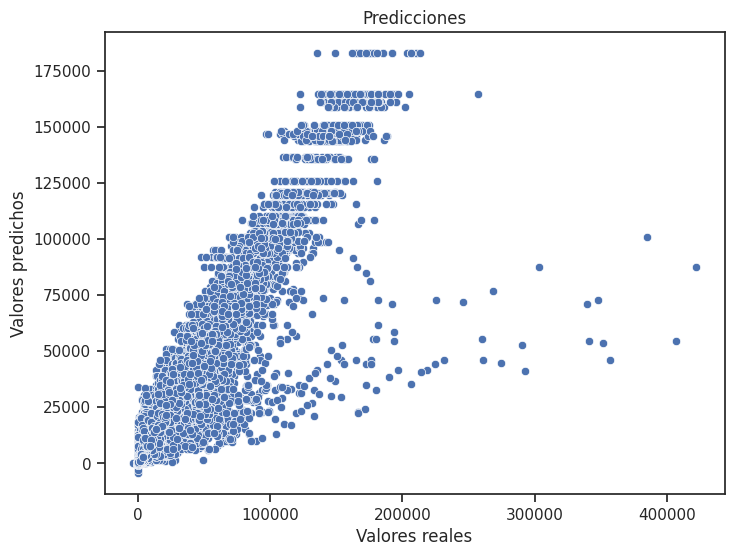

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions(y_true, y_pred, title='Predicciones'):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.title(title)
    plt.show()

def evaluate_predictions(y_true, y_pred):
    print("MAE:", metrics.mean_absolute_error(y_true, y_pred))
    print("MSE:", metrics.mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    plot_predictions(y_true, y_pred)

evaluate_predictions(y_test, final)


De la grafica de Dispercion anterior podemos analizar que La distribución de los puntos en la diagonal indica una buena correlación entre los valores reales y los valores predichos. Por lo tanto, los modelos de predicción parecen ser buenos para predecir las ventas semanales. La concentración de puntos en la diagonal también indica que los modelos son precisos en sus predicciones.

La dispersión de algunos puntos fuera de la diagonal podría indicar que existen valores atípicos o valores reales que difieren significativamente de las predicciones. Esto podría deberse a factores externos no considerados en el modelo, como cambios en la demanda del mercado, estacionalidad, entre otros.

La observación de patrones de distribución desde los 125000 valores predichos hacia arriba sugiere que los modelos tienen más dificultades para predecir valores extremadamente altos de ventas semanales. Por lo tanto, podría ser necesario revisar o ajustar los modelos para mejorar la precisión de las predicciones en el rango de valores más altos.

In [121]:
#prediccion delo modelo final
print('valor MAE: ',metrics.mean_absolute_error(y_test, final))
print('Valor MSE: ' ,metrics.mean_squared_error(y_test, final))
print('RMSE: ' ,np.sqrt(metrics.mean_squared_error(y_test, final)))
print("Prediccion del modelo final")

valor MAE:  2745.7233656405447
Valor MSE:  53414571.751402706
RMSE:  7308.52733123457
Prediccion del modelo final


**CONCLUSION**

El hecho de que el RMSE obtenido después de entrenar los modelos 7307.51 sea ligeramente mayor que el RMSE obtenido antes de entrenar los modelos 7291 sugiere que la combinación de los dos modelos de regresión (XGBRegressor y RandomForestRegressor) no mejoró significativamente la precisión de la predicción en comparación con el mejor modelo individual antes de combinarlos.

Es posible que la combinación de los dos modelos de regresión haya mejorado la precisión en algunos casos o en ciertos aspectos de la predicción, pero en general, no se observa una mejora significativa en la métrica de evaluación elegida (en este caso, el RMSE).